In [29]:
%matplotlib inline

import pandas as pd
from scipy import stats 
from matplotlib import pyplot as plt
import os

os.environ['NO_CUDA'] = '1'

from torch_rl.stats import RLTrainingStats


ddpg_data_dir = "ddpg_2018-02-09_12:41:13.318690"
ddpg_her_data_dir = "ddpg_her_2018-02-09_11:52:56.854107"
ddpg_her_spiking_data_dir = "ddpg_reservoir_2018-02-20_11:12:32.420402"


df_ddpg = RLTrainingStats.load('/disk/users/vlasteli/no_backup/Projects/torch_rl/examples/' + ddpg_data_dir)
df_ddpg_spiking = RLTrainingStats.load('/disk/users/vlasteli/no_backup/Projects/torch_rl/examples/' + ddpg_her_spiking_data_dir)
df_ddpg_her = RLTrainingStats.load('/disk/users/vlasteli/no_backup/Projects/torch_rl/examples/' + ddpg_her_data_dir)

df_ddpg_spiking.add_suffix("_spiking")



,episode_reward_spiking,mvavg_reward_spiking,step_spiking
episode,,,
0,0,0.000000,199
1,0,0.000000,199
2,12,4.000000,199
3,6,4.500000,199
4,19,7.400000,199
5,0,6.166667,199
6,4,5.857143,199
7,0,5.125000,199
8,0,4.555556,199


/fzi/ids/vlasteli/no_backup/miniconda2/envs/ai/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=300,min_periods=1,center=False).mean()
  """
/fzi/ids/vlasteli/no_backup/miniconda2/envs/ai/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=200,min_periods=1,center=False).mean()
  """
/fzi/ids/vlasteli/no_backup/miniconda2/envs/ai/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,min_periods=1,center=False).mean()
  """
/fzi/ids/vlasteli/no_backup/miniconda2/envs/ai/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created v

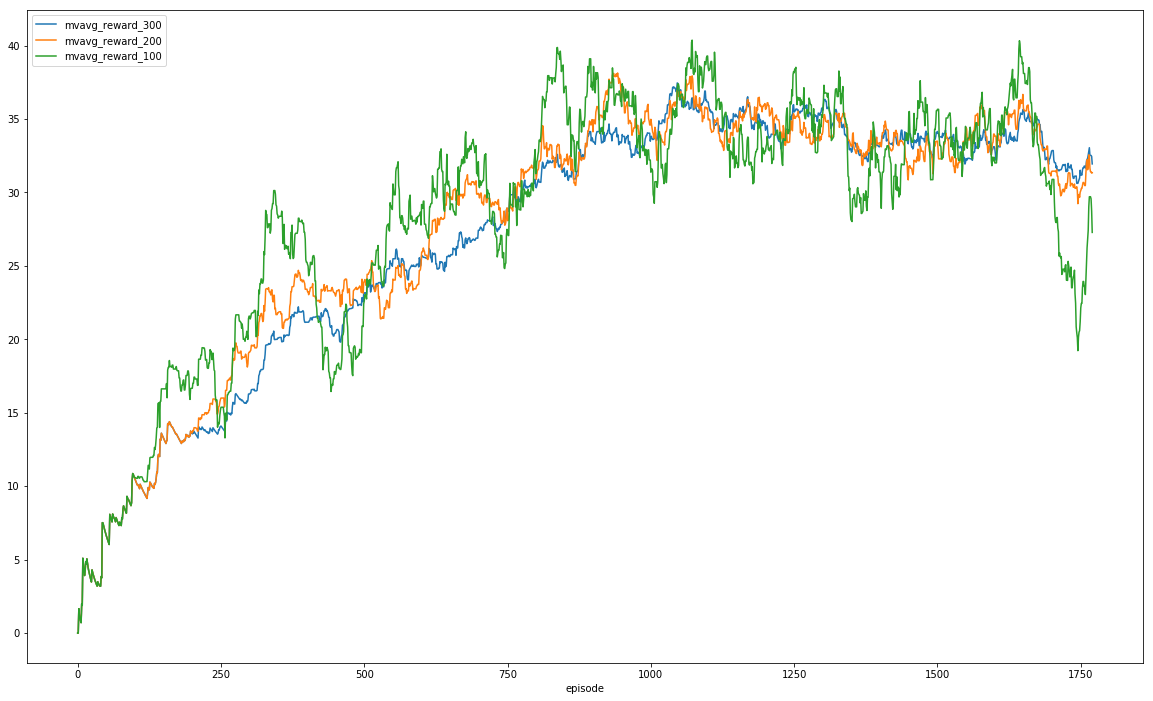

In [30]:
mvavg_windows = [300, 200, 100]
keys = ["mvavg_reward_" + str(x) for x in mvavg_windows]
def calc_moving_averages(df, col='episode_reward'):
    for w, k in zip(mvavg_windows, keys):
        df[k] = pd.rolling_mean(df[col], window=w, min_periods=1)

calc_moving_averages(df_ddpg)
calc_moving_averages(df_ddpg_her)
calc_moving_averages(df_ddpg_spiking)
df_ddpg_her.plot(y=keys, figsize=(20,12))



# Comparison of Moving Average Rewards

In [31]:
df_join.describe()

,episode_reward_ddpg,mvavg_reward_ddpg,step_ddpg,mvavg_reward_300_ddpg,mvavg_reward_200_ddpg,mvavg_reward_100_ddpg,episode_reward_ddpg_her,mvavg_reward_ddpg_her,step_ddpg_her,mvavg_reward_300_ddpg_her,mvavg_reward_200_ddpg_her,mvavg_reward_100_ddpg_her,episode_reward_reservoir_her_reservoir_her_reservoir_her,mvavg_reward_reservoir_her_reservoir_her_reservoir_her,step_reservoir_her_reservoir_her_reservoir_her,mvavg_reward_300_reservoir_her_reservoir_her_reservoir_her,mvavg_reward_200_reservoir_her_reservoir_her_reservoir_her,mvavg_reward_100_reservoir_her_reservoir_her_reservoir_her
count,2251.000000,2251.000000,2251.0,2251.000000,2251.000000,2251.000000,1771.000000,1771.000000,1771.0,1771.000000,1771.000000,1771.000000,1601.000000,1601.000000,1601.0,1601.000000,1601.000000,1601.000000
mean,5.580187,5.561504,199.0,5.489154,5.493370,5.492379,29.123094,29.057794,199.0,27.189980,27.777888,28.282189,27.122423,27.074831,199.0,25.333087,25.770366,26.368442
std,12.706923,4.249119,0.0,0.746739,0.916836,1.303149,49.103196,16.097299,0.0,8.890972,8.710431,8.652155,48.790086,14.645308,0.0,5.094314,5.484894,6.188076
min,0.000000,0.000000,199.0,0.000000,0.000000,0.000000,0.000000,0.000000,199.0,0.000000,0.000000,0.000000,0.000000,0.000000,199.0,0.000000,0.000000,0.000000
25%,0.000000,2.500000,199.0,5.173333,4.876330,4.550000,0.000000,16.800000,199.0,21.736667,23.310000,23.990000,0.000000,15.900000,199.0,22.820000,22.885000,23.180000
50%,0.000000,4.600000,199.0,5.656667,5.600000,5.410000,1.000000,27.500000,199.0,31.740000,31.650000,30.890000,0.000000,25.300000,199.0,24.563333,25.080000,25.990000
75%,6.000000,7.400000,199.0,5.940000,6.165000,6.400000,38.000000,40.200000,199.0,33.881667,34.150000,34.525000,37.000000,36.700000,199.0,29.913333,30.180000,30.270000
max,154.000000,28.000000,199.0,6.883333,7.190000,9.290000,199.000000,81.700000,199.0,37.456667,38.135000,40.370000,199.000000,91.600000,199.0,35.126667,36.965000,40.860000


MWW RankSum P = 0.0  < 0.05?
T-test P = 0.0  < 0.1?


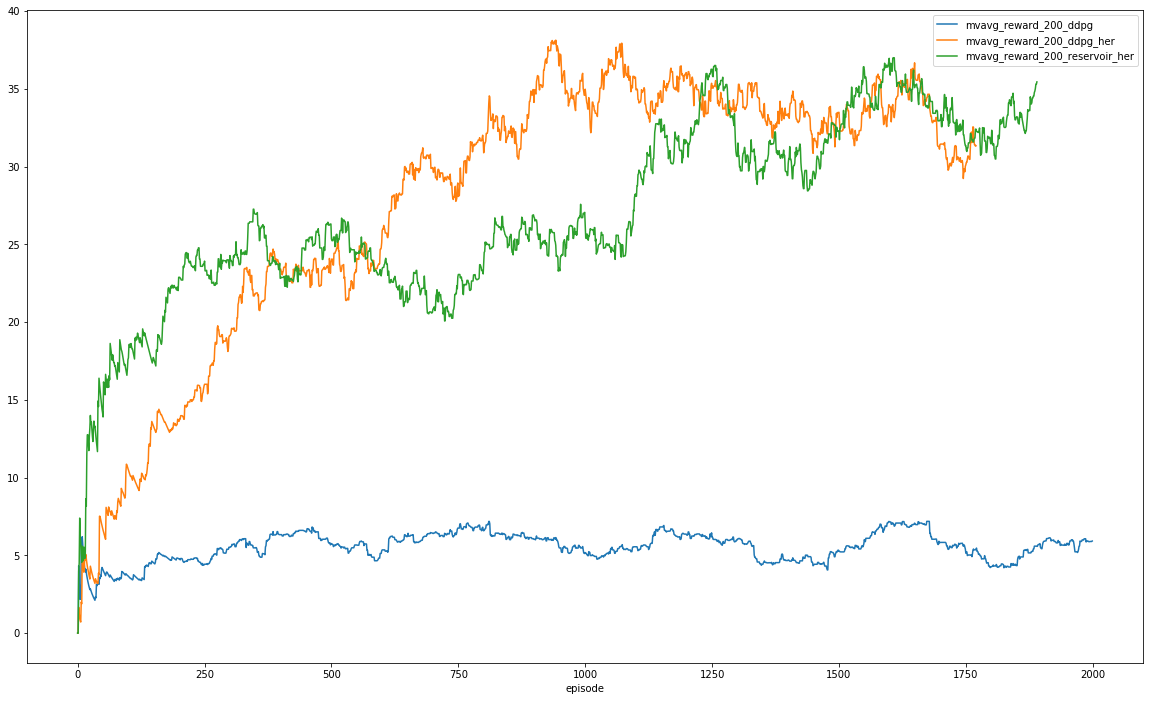

In [32]:
df_join = df_ddpg.join(df_ddpg_her, rsuffix="_ddpg_her", lsuffix="_ddpg")
df_ddpg_spiking = df_ddpg_spiking.add_suffix("_reservoir_her")
df_join = df_join.join(df_ddpg_spiking)
z_stat, p_val = stats.ranksums(df_ddpg_her['mvavg_reward_200'], df_ddpg['mvavg_reward_200'])  
print("MWW RankSum P =", p_val, " < 0.05?")  
z_stat, p_val = stats.ttest_ind(df_ddpg_her['mvavg_reward_200'], df_ddpg['mvavg_reward_200'])  
print("T-test P =", p_val, " < 0.1?")  

df_join.filter(regex="mvavg_reward_200*")[0:2000].plot(figsize=(20,12))

# Comparison of Success Rates

In [33]:
df_join['success_ddpg_her'] = (df_join.episode_reward_ddpg_her > 0).astype(int)
df_join['success_ddpg'] = (df_join.episode_reward_ddpg > 0).astype(int)
df_join['success_ddpg_reservoir'] = (df_join.episode_reward_reservoir > 0).astype(int)

mvavg_windows = [300, 200, 100]
keys = ["success_rate_" + str(x) for x in mvavg_windows]
def calc_moving_averages(df, col='success_ddpg', suff='_ddpg'):
    for w, k in zip(mvavg_windows, keys):
        df[k + suff] = pd.rolling_mean(df[col], window=w, min_periods=1)

calc_moving_averages(df_join)
calc_moving_averages(df_join, col='success_ddpg_her', suff='_ddpg_her')

df_join.filter(regex="success_rate_200*")[:1500].plot(figsize=(20,12))


AttributeError: 'DataFrame' object has no attribute 'episode_reward_reservoir'

#  Mann-Whitney-Wilcoxon (MWW) RankSum test

The MWW RankSum test is a useful test to determine if two distributions are significantly different or not. Unlike the t-test, the RankSum test does not assume that the data are normally distributed, potentially providing a more accurate assessment of the data sets.

If P < 0.05 the distributions significantly differ.

In [ ]:
z_stat, p_val = stats.ranksums(df1['mvavg_reward'], df2['mvavg_reward'])  
  
print("MWW RankSum P =", p_val)  

# T-test

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores.

In [ ]:
z_stat, p_val = stats.ttest_ind(df1['mvavg_reward'], df2['mvavg_reward'])  
  
print("T-test P =", p_val)  